## **Gender gap in ballet collaborations**

In this notebook, I share the visualization of the gender gap of most central ballet creators of the American Ballet Theatre, the New York City Ballet, the National Ballet of Canada, and the Royal Ballet of the Royal Opera House. 

Data has been processed to include only the top 20 positions by gender in each company. Data includes the artists' rank and the normalized degree centrality. 

Full data can be found here: https://doi.org/10.5281/zenodo.8374171 

Visualizations for: 
Herrera-Guzmán, Y., Lee, E. & Kim, H. Structural gender imbalances in ballet collaboration networks. EPJ Data Sci. 12, 53 (2023). https://doi.org/10.1140/epjds/s13688-023-00428-z

In [1]:
library(tidyverse)
library(readr)
library(ggplot2)
library(dplyr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [10]:
data <- read.csv('data_gender.csv')

In [11]:
data$company_f = factor(data$company, levels=c('ABT','NYCB','NBC','ROH'))

In [13]:
override.shape <- c(16, 17)

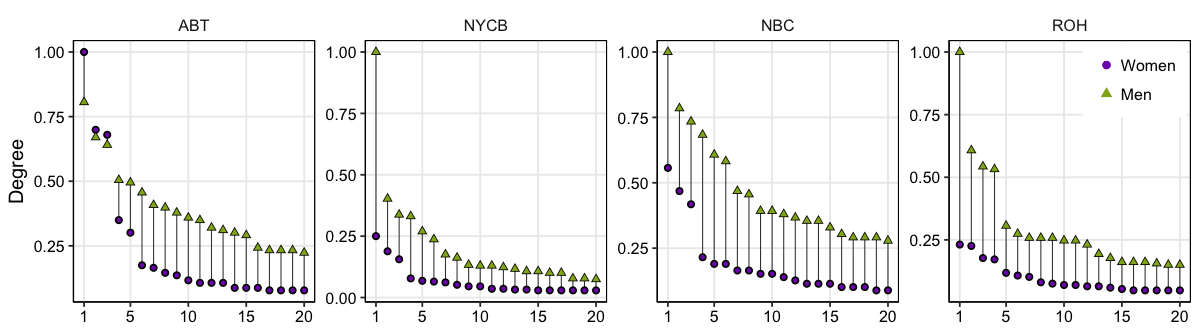

In [27]:
# Normalized
options(repr.plot.width = 10, repr.plot.height = 2.8)
data %>% 
    spread(gender, norm) %>%
    ggplot(aes(x=rank)) +
            geom_segment(aes(x=rank, xend=rank, y=male, yend=female), color="grey25", size=0.3) +
            geom_point(aes(x=rank, y=female), shape=19, color="black", size=1.6, alpha=1, show.legend = FALSE) +
            geom_point(aes(x=rank, y=male), shape=17, color="black", size=1.8, alpha=1, show.legend = FALSE) +
            geom_point(aes(x=rank, y=male, color='Women', shape='Men'), size=1.2, alpha=1, show.legend = TRUE) +
            geom_point(aes(x=rank, y=female, color='Men', shape='Women'), size=1, alpha=1, show.legend = TRUE) +
            labs(x="Rank", y = "Degree") +
            theme_bw() +
            scale_color_manual(values = c('Men'="#8126BA", 'Women'="#90B01C"), labels = c('Women', 'Men')) +
            scale_shape_manual(values = c('Men'=17, 'Women'=16), labels = c('Women', 'Men'), guide = FALSE) +
            guides(color = guide_legend(override.aes = list(shape = override.shape, size = 2))) +
            scale_x_continuous(breaks=c(1, 5, 10, 15, 20, 30, 40)) + 
            theme(strip.background =element_rect(fill="transparent", colour = "transparent"), 
                  panel.background = element_rect(fill = "transparent", colour = "black"),
                  panel.border = element_rect(colour = "black", fill=NA, size=0.6),
                  panel.grid.minor = element_blank(),  
                  axis.line = element_line(colour = "black", size=0.2), 
                  legend.title = element_blank(),
                  legend.position = c(0.95, 0.85),
                  legend.key = element_rect(fill = "transparent"), 
                  text = element_text(size=12),
                  axis.text.x = element_text(colour = "black"),
                  axis.text.y = element_text(colour = "black"),
                  axis.title.x = element_blank()) +
            facet_wrap(~company_f, ncol=4, scales= 'free') # +
            # labs(tag = "a") + theme(plot.tag = element_text(family = "Helvetica", face = "bold"))
# ggsave('your_plot.pdf', device = "pdf", width = 10, height = 3.2)

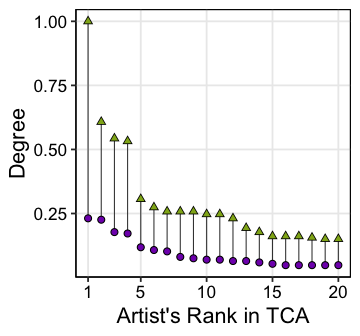

In [29]:
# Only ROH for Data Stories 2021
options(repr.plot.width = 3, repr.plot.height = 2.8)
data %>% 
    filter(company_f == 'ROH') %>%
    spread(gender, norm) %>%
    ggplot(aes(x=rank)) + 
            geom_segment(aes(x=rank, xend=rank, y=male, yend=female), color="grey25", size=0.3) +
            geom_point(aes(x=rank, y=female), color="black", size=1.6, alpha=1) +
            geom_point(aes(x=rank, y=male), shape=17, color="black", size=1.8, alpha=1) +
            geom_point(aes(x=rank, y=female), color="#8126BA", size=1, alpha=1) +
            geom_point(aes(x=rank, y=male), shape=17, color="#90B01C", size=1.2, alpha=1) +
            labs(x="Rank", y = "Degree") +
            theme_bw() +
            scale_color_manual(values = c('Women'="#8126BA", 'Men'="#90B01C"), labels = c('Women', 'Men')) +
            guides(color = guide_legend(override.aes = list(shape = override.shape, size = 2))) +
            scale_shape_manual(values = c('Women'=19, 'Men'=17), labels = c('Women', 'Men'), guide = FALSE) +
           # scale_color_manual(values=c(male="#17BECF", female="#E377C2")) +
           # scale_fill_manual(values=c(female="#E377C2", male="#17BECF")) +
            scale_x_continuous("Artist's Rank in TCA",
                               breaks=c(1, 5, 10, 15, 20, 30, 40)) + 
            theme(strip.background =element_rect(fill="transparent", colour = "transparent"), 
                  panel.border = element_rect(colour = "black", fill=NA, size=0.6), 
                  panel.background = element_rect(fill = "transparent", colour = "black"), 
                  panel.grid.minor = element_blank(), 
                  legend.title = element_blank(),
                  axis.line = element_line(colour = "black", size=0.2),
                  legend.position = c(0.70, 0.85),
                  legend.key = element_rect(fill = "transparent"),
                  text = element_text(size=13), 
                  strip.text.x = element_blank(),
                  axis.text.x = element_text(colour = "black"),
                  axis.text.y = element_text(colour = "black")) 
# ggsave('your_plot.pdf', device = "pdf", width = 3, height = 2.8)
# ggsave(gap, filename = "your_plot2.eps", height=2.8, width=3)